# Heart Disease Diagnostic Analysis using Python 

### Importing Libraries for Data Analysis and Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

### Reading CSV Data into Pandas DataFrame

In [3]:
df=pd.read_csv("Heart Disease data.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### checking for missing Values 

In [5]:
missing_values = df.isnull().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Attributes:
    age: Age of the patient.
    sex: Gender of the patient (0 = female, 1 = male).
    cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
    trestbps: Resting blood pressure (in mm Hg).
    chol: Serum cholesterol in mg/dl.
    fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
    restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing     probable or definite left ventricular hypertrophy).
    thalach: Maximum heart rate achieved.
    exang: Exercise induced angina (1 = yes, 0 = no).
    oldpeak: ST depression induced by exercise relative to rest.
    slope: Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
    ca: Number of major vessels (0-3) colored by flourosopy.
    thal: Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect).
    target: Presence of heart disease (1 = yes, 0 = no).

### Changing headers name to make it more understandable 

In [7]:
new_headers=["age","sex","chest_pain_type","resting_blood_pressure","cholestoral","blood_sugar","electrocardiographic","maximum_heart_rate","exercise_induced_angina","oldpeak","slope","number_of_major_vessels","Thalassemia","target"]
df.columns=new_headers
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'blood_sugar', 'electrocardiographic',
       'maximum_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'Thalassemia', 'target'],
      dtype='object')

## Basic Statistics 
Computing summary statistics (mean, median, standard deviation,min and max) for numerical attributes like age, blood pressure, cholesterol, and heart rate.

In [13]:
summary_stats=df.describe()
attributes=['age','resting_blood_pressure','cholestoral','maximum_heart_rate']
selected_stats=summary_stats.loc[['mean','50%','std',"max","min"],attributes]
print("\nsummary statics:")
print(selected_stats)


summary statics:
            age  resting_blood_pressure  cholestoral  maximum_heart_rate
mean  54.434146              131.611707    246.00000          149.114146
50%   56.000000              130.000000    240.00000          152.000000
std    9.072290               17.516718     51.59251           23.005724
max   77.000000              200.000000    564.00000          202.000000
min   29.000000               94.000000    126.00000           71.000000


# Heart Disease Rates
### 1. overall prevalence of heart disease in the dataset

In [15]:
prevalence=df["target"].mean()*100
print(f'Prevalence of Heart Disease in the Dataset:{prevalence:.2f}%')

Prevalence of Heart Disease in the Dataset:51.32%


### 2. Distribution of heart disease presence across different categories

## 2A. Gender: Male vs. Female.

In [53]:
males = df['sex'].sum()
males

713

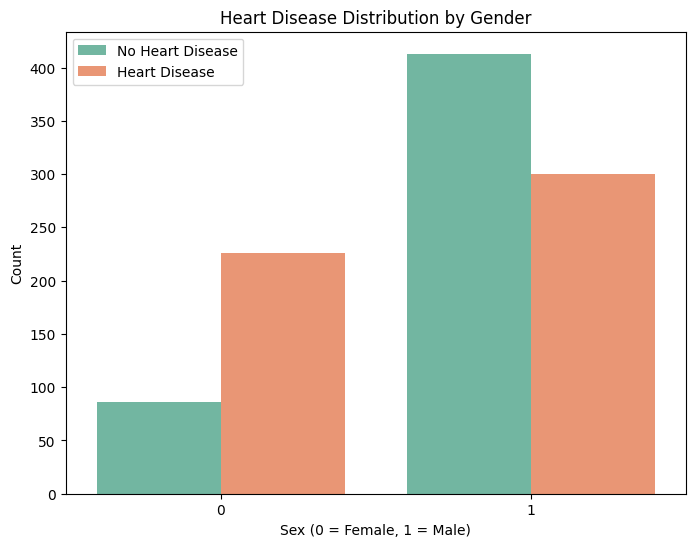

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=df, palette='Set2')
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

## 2B. Age Groups: Different age ranges (e.g., '20-39', '40-59', '60-79').

In [17]:
age_bins = [20, 40, 60, 80]
age_labels = ['20-39', '40-59', '60-79']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df['age_group']

0       40-59
1       40-59
2       60-79
3       60-79
4       60-79
        ...  
1020    40-59
1021    60-79
1022    40-59
1023    40-59
1024    40-59
Name: age_group, Length: 1025, dtype: category
Categories (3, object): ['20-39' < '40-59' < '60-79']

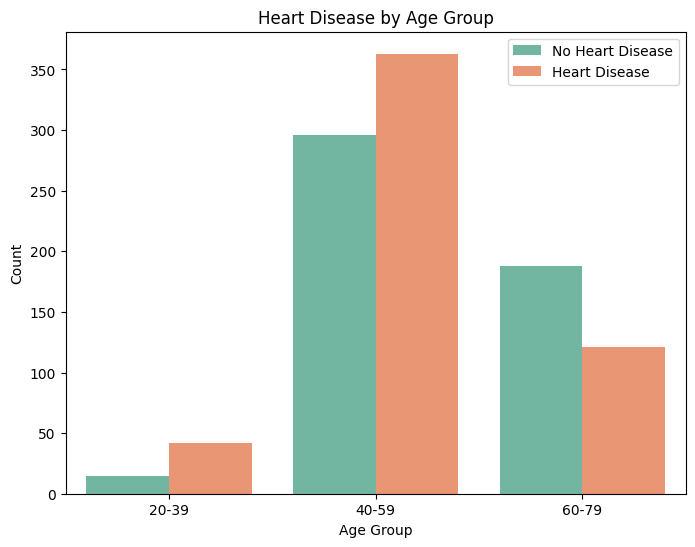

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='target', data=df, palette='Set2')
plt.title('Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

## 2C. Chest pain Type and proportion with heart disese 

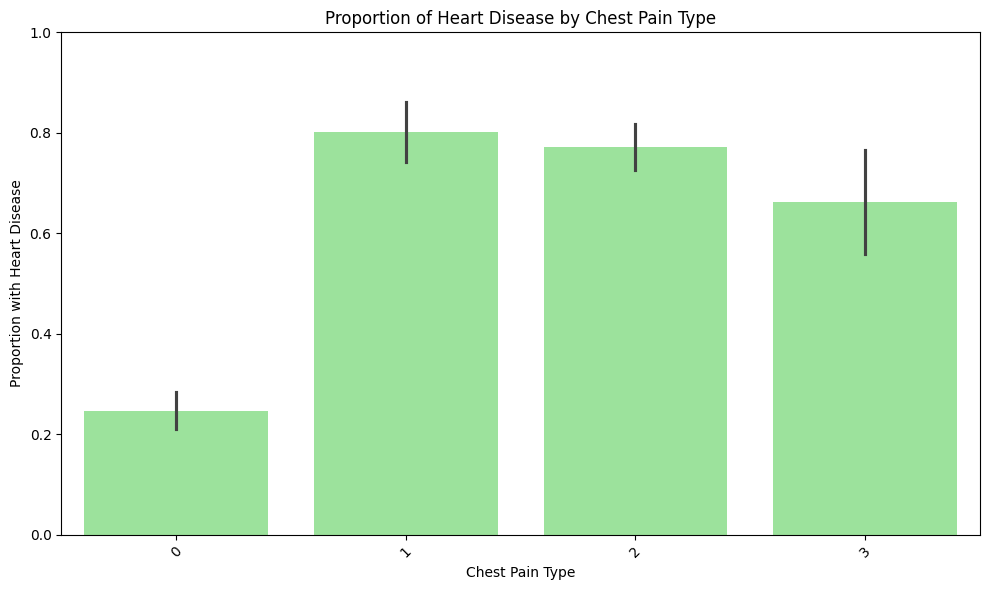

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='chest_pain_type', y='target', data=df, color='lightgreen')
plt.xlabel('Chest Pain Type')
plt.ylabel('Proportion with Heart Disease')
plt.title('Proportion of Heart Disease by Chest Pain Type')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.D Excercise induce agina vs heart disease

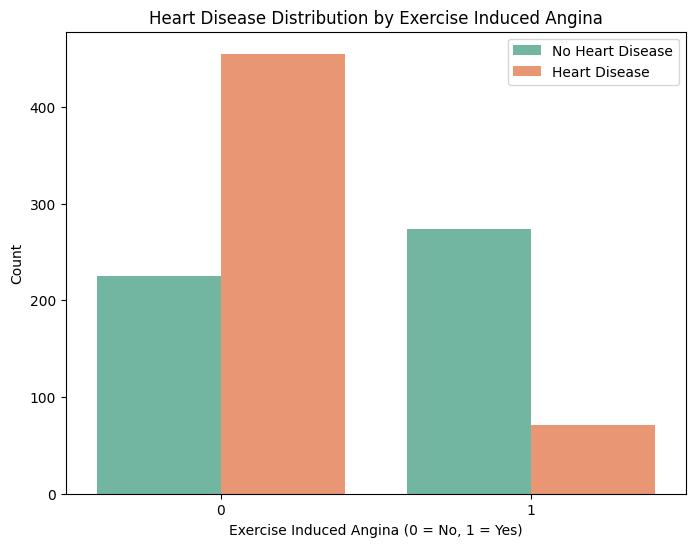

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='exercise_induced_angina', hue='target', data=df, palette='Set2')
plt.title('Heart Disease Distribution by Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

### 3. Correlation Analysis

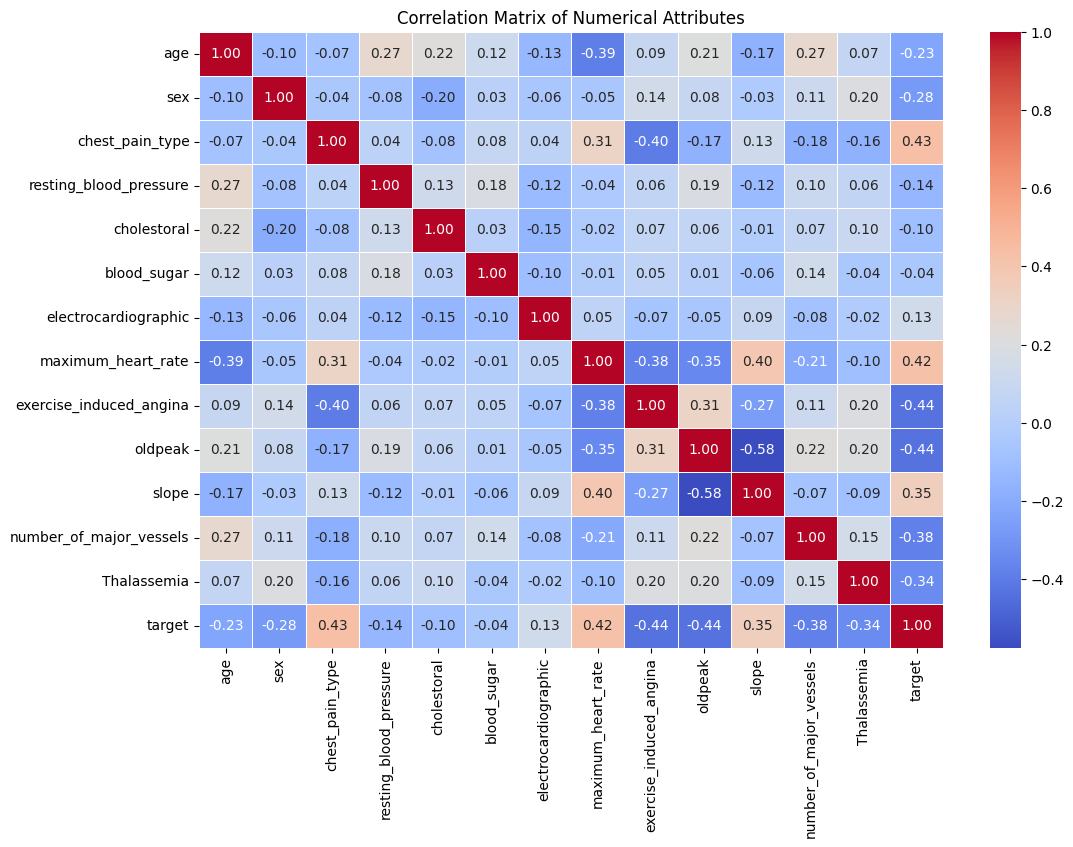

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

### 4. Relationship between different Attributes

## 4A. Age vs. Maximum Heart Rate 

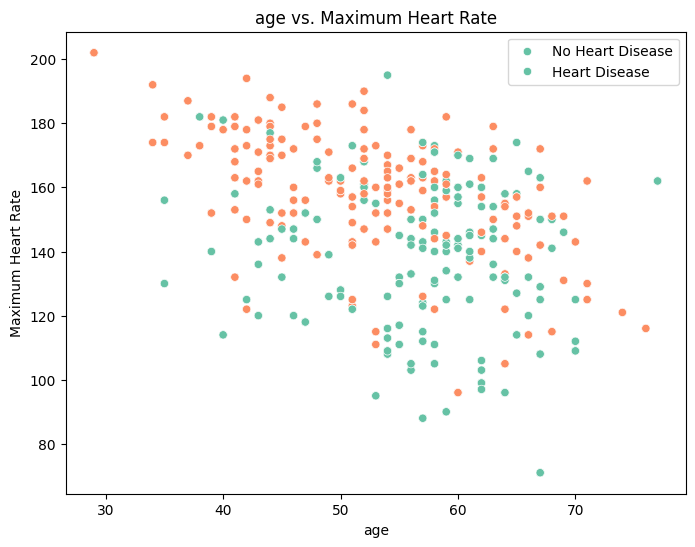

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='maximum_heart_rate', data=df, hue='target', palette='Set2')
plt.title('age vs. Maximum Heart Rate')
plt.xlabel('age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()


## 4B. Chest pain Type vs Gender 

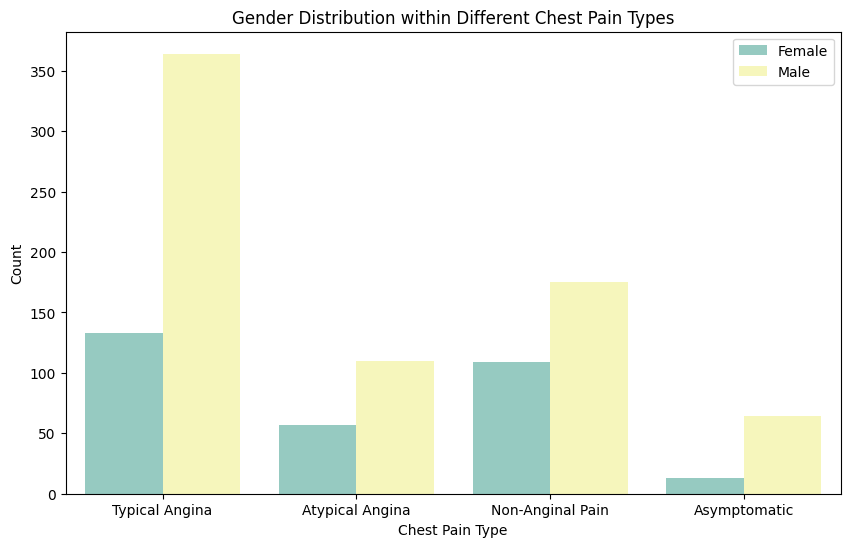

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='chest_pain_type', hue='sex', data=df, palette='Set3')
plt.title('Gender Distribution within Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.legend(['Female', 'Male'])
plt.show()

## 4C. Heart Disease vs Cholestrol 

C:\Users\israr mohammed\AppData\Local\Temp\ipykernel_15396\668127005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='cholestoral', data=df, palette='Set2')


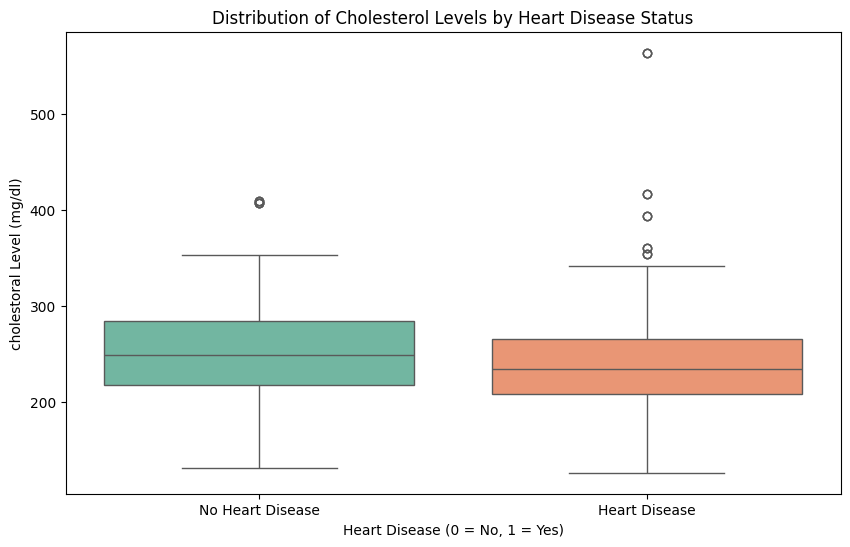

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='cholestoral', data=df, palette='Set2')
plt.title('Distribution of Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('cholestoral Level (mg/dl)')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

## 4 D. Major vessel colored  by Fluoroscopy vs heart disease

C:\Users\israr mohammed\AppData\Local\Temp\ipykernel_15396\2859506839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_major_vessels', y='target', data=df, palette='Set2')


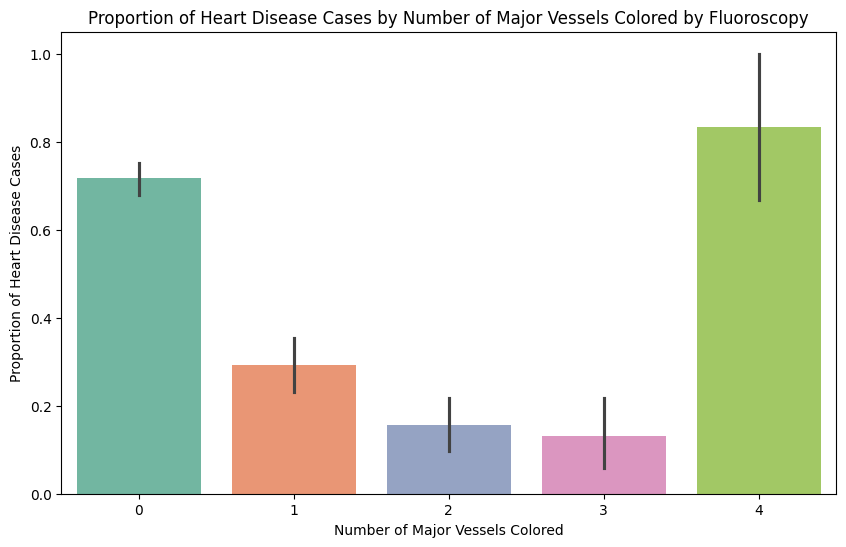

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_major_vessels', y='target', data=df, palette='Set2')
plt.title('Proportion of Heart Disease Cases by Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Major Vessels Colored')
plt.ylabel('Proportion of Heart Disease Cases')
plt.xticks(rotation=0) 

plt.show()

## 4E. Cholestrol vs Blood Pressure 

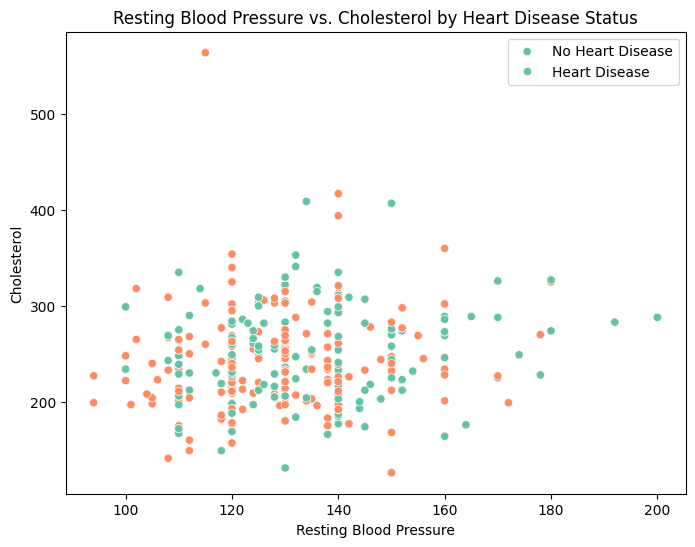

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='resting_blood_pressure', y='cholestoral', hue='target', data=df, palette='Set2')
plt.title('Resting Blood Pressure vs. Cholesterol by Heart Disease Status')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

## 4F. Remainig Analysis using sub plots 

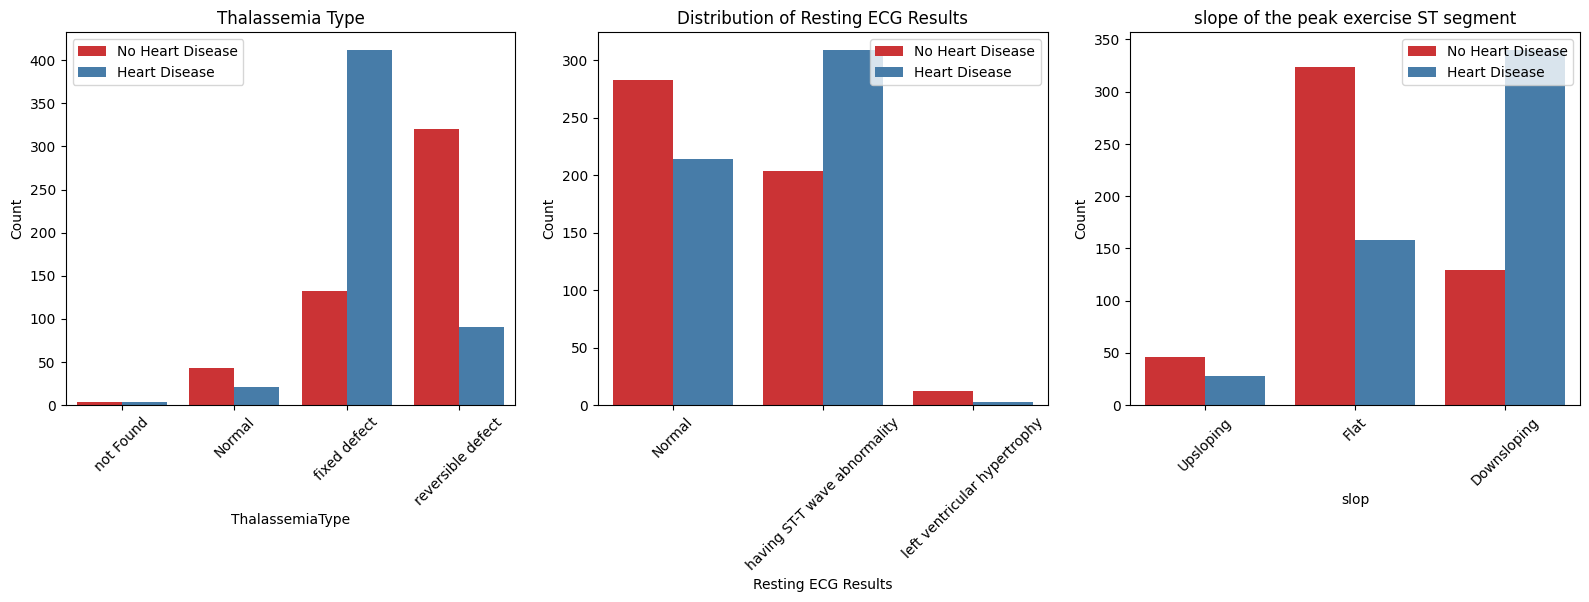

In [52]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Thalassemia', hue='target', data=df, palette='Set1')
plt.title('Thalassemia Type')
plt.xlabel('ThalassemiaType')
plt.xticks(ticks=[0,1, 2, 3], labels=['not Found','Normal', 'fixed defect', 'reversible defect'])
plt.xticks(rotation=45)

plt.legend(['No Heart Disease', 'Heart Disease'])
plt.ylabel('Count')

plt.subplot(2, 3, 2)
sns.countplot(x='electrocardiographic', hue='target', data=df, palette='Set1')
plt.title('Distribution of Resting ECG Results')
plt.xlabel('Resting ECG Results')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'having ST-T wave abnormality', 'left ventricular hypertrophy'])
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])


plt.subplot(2, 3, 3)
sns.countplot(x='slope', hue='target', data=df, palette='Set1')
plt.title('slope of the peak exercise ST segment')
plt.xlabel('slop')
plt.xticks(ticks=[0, 1, 2], labels=['Upsloping', 'Flat', 'Downsloping'])
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

# Findings 

### The average age is 54.4 years, ranging from 29 to 77 years.
    covering typical age ranges associated with cardiovascular risk.
### Resting blood pressure averages 131.6 mmHg, ranging from 94 to 200 mmHg.
    he average of 131.6 mmHg suggests slightly elevated blood pressure compared to the normal range of less than 120/80 mmHg.
#### Average cholesterol level is 246 mg/dL, ranging from 126 to 564 mg/dL.
    The average cholesterol level of 246 mg/dL is higher than the healthy range (below 200 mg/dL), indicating potential elevated cardiovascular risk.
### Maximum heart rate averages 149.1 bpm, ranging from 71 to 202 bpm.
    The average maximum heart rate of 149.1 bpm is slightly lower than expected for individuals of similar age, which could reflect varying fitness levels or health conditions.

### Prevalence of Heart Disease in the Dataset:51.32%
    which indiates more then half of thetest samples are having heart disease.

### Based on Gender
    -Among those with heart disease, there are fewer males compared to females, indicating a lower prevalence of heart disease among males in the sample.
    -Conversely, among those without heart disease, the opposite trend is observed: there are more males than females.

**Age Groups and Heart Disease**:
   - Individuals aged 40-59 years have the highest prevalence of heart disease within the sample.
   - The age group 20-39 years has a lower prevalence of heart disease compared to the 40-59 age group.
   - The age group 60-79 years has the lowest prevalence of heart disease among the groups considered.
- The sample data suggests that individuals aged 40-59 years are not only most likely to have heart disease but also represent the largest segment of the sample overall. This age group exhibits a significant concentration of both heart disease and non-heart disease cases within the dataset.

# More Insights

1. **Thalassemia Type**:
   - Individuals with 'reversible defect' or 'fixed defect' thalassemia types are more likely to have heart disease.
   - 'Normal' thalassemia type individuals show a lower incidence of heart disease.
   - Those where thalassemia was 'not found' have a mixed but generally lower prevalence of heart disease.

2. **Resting ECG Results**:
   - Individuals with 'left ventricular hypertrophy' on resting ECG tend to have a higher prevalence of heart disease.
   - Both 'Normal' and 'having ST-T wave abnormality' categories show varying prevalence of heart disease, with 'Normal' typically lower.
  
3. **Slope of the Peak Exercise ST Segment**:
   - The 'downsloping' slope of the peak exercise ST segment is associated with a higher prevalence of heart disease.
   - 'Flat' and 'upsloping' slopes show varying prevalence, with 'upsloping' generally having a lower association with heart disease.

4. **Correlation Matrix**:
   - Age, maximum heart rate, and possibly cholesterol levels show significant correlations with heart disease ('target'), suggesting they may be important predictors.

5. **Scatter Plot: Age vs. Maximum Heart Rate**:
   - Individuals with heart disease tend to have lower maximum heart rates as they age compared to those without heart disease.

6. **Gender Distribution within Different Chest Pain Types**:
   - The distribution of chest pain types varies between males and females, highlighting gender differences in how chest pain is reported or perceived.

7. **Box Plot: Cholesterol Levels by Heart Disease Status**:
   - Median cholesterol levels are higher in individuals with heart disease compared to those without, indicating cholesterol levels may influence heart disease risk.

8. **Bar Plot: Proportion of Heart Disease Cases by Number of Major Vessels Colored by Fluoroscopy**:
   - As the number of major vessels colored by fluoroscopy increases, there is generally a higher proportion of heart disease cases, suggesting a potential diagnostic significance of this feature.
